In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from readCanLitefileUtilsDS import *
from calibUtils import *

In [2]:
def compute_CalibBiasV(df, df_calibparam, values):
    df = df.copy()
    a_coeff = 1.8535e-3
    b_coeff = 0
    LSBres = 1.8535e-3


    for val in values:
        #print(val)
        val_calib = val + '_calib'
    
        
        #compute ADC calibrated value in dec
        
        df[val] = df[val].apply(lambda x: int(x,16) )
        #df[val_calib] = ( df[val] + df_calibparam['Offset_Sig BiasV']) * (df_calibparam['Gain_Usig BiasV'] /32768) * a_coeff + b_coeff
        df[val_calib] = df[val] * 1.8535e-3
       

        #compare with the DMM value
        tmp_DMMlabel = val.replace('ADC', 'DMM')
        val_err = val + 'err'
        df[val_err] = df[tmp_DMMlabel]-df[val_calib]

        
        #compute error 
        val_sig = val + 'sigma'
        df[val_sig] = df[val_err]/LSBres
        
        
    return df

In [3]:
def compute_CalibBiasVv2(df, df_calibparam, values):
    df = df.copy()
    a_coeff = 1.8535e-3
    b_coeff = 0
    LSBres = 1.8535e-3


    for val in values:
        #print(val)
        val_calib = val + '_calib'
    
        
        #compute ADC calibrated value in dec
        
        df[val] = df[val].apply(lambda x: int(x,16) )
        #df[val_calib] = ( df[val] + df_calibparam['Offset_Sig BiasV']) * (df_calibparam['Gain_Usig BiasV'] /32768) * a_coeff + b_coeff
        df[val_calib] = df[val] * 1.8535e-3
       

        #compare with the DMM value
        tmp_DMMlabel = val.replace('ADC', 'DMM')
        val_err = val + 'err'
        df[val_err] = df[tmp_DMMlabel]

        
        #compute error 
        val_sig = val + 'sigma'
        df[val_sig] = df[val_err]/LSBres
        
        
    return df

In [4]:
def drawplot(df, boardSN):
    plt.figure(figsize=(10,6))

    ax = plt.gca()


    ax = df_aftercalibtest.plot.scatter(x='index', y='ADC000sigma', color="DarkBlue", label="DAC000 sigma", ax=ax, marker = 'o', s=40)
    ax = df_aftercalibtest.plot.scatter(x='index', y='ADC3FFsigma', color="DarkGreen", label="DAC3FF sigma ", ax=ax, marker = 'o', s=40)
    #ax = df_aftercalibtest.plot.scatter(x='index', y='ADCCFFsigma', color="Pink", label="DACCFF sigma", ax=ax, marker = 'o', s=40 )
    ax = df_aftercalibtest.plot.scatter(x='index', y='ADCFFFsigma', color="Orange", label="DACFFF sigma", ax=ax, marker = 'o', s=40 )

    ax = plt.hlines(1, -0.2, 11.5, linestyles='dotted', color='red')
    ax = plt.hlines(-1, -0.2, 11.5, linestyles='dotted', color='red')

    plt.grid(b=True)
    plt.title('Error/LSB per channel (' + boardSN + ')')
    plt.xlabel('Channel')
    plt.ylabel('Error/LSB')

    plt.show()

    return

# define the inputs

#board SN04
SN_board = 'SN04'

#file 1 (DACset 0x000)
file_DACset000 = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacset000.csv'

#file 2 (DACset 0x3FF)
file_DACset3FF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacset3FF.csv'

#file 3 (DACset 0xCFF)
file_DACsetCFF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacsetCFF.csv'

#file 4 (DACset 0xFFF)
file_DACsetFFF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacsetFFF.csv'


DMM_000 = [108.75, 108.757, 108.742, 108.746, 108.745, 108.745, 
          108.737, 108.743, 108.747, 108.717, 108.727, 108.757]

DMM_3FF = [110.638, 110.643, 110.631, 110.635, 110.636, 110.637,
          110.627, 110.631, 110.640, 110.602, 110.619, 110.651]

DMM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]


MM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]


values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN04_v6_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

# define the inputs


##SN11
SN_board = 'SN11'

#file 1 (DACset 0x000)
#file_DACset000 = './files/SN11/21-05-26_152152_validcalib_dacset000_v1.csv'
file_DACset000 = './files/SN11/21-05-31_112046_validcalib_SN11_DACset000_v3_20x.csv'


#file 2 (DACset 0x3FF)
#file_DACset3FF = './files/SN11/21-05-26_152152_validcalib_dacset3FF_v1.csv'
file_DACset3FF = './files/SN11/21-05-31_112046_validcalib_SN11_DACset3FF_v3_20x.csv'


#file 3 (DACset 0xCFF)
#file_DACsetCFF = './files/SN11/21-05-26_152152_validcalib_dacsetCFF_v1.csv'
file_DACsetCFF = './files/SN11/21-05-31_112046_validcalib_SN11_DACsetCFF_v3_20x.csv'


#file 4 (DACset 0xFFF)
#file_DACsetFFF = './files/SN11/21-05-26_152152_validcalib_dacsetFFF_v1.csv'
file_DACsetFFF = './files/SN11/21-05-31_112046_validcalib_SN11_DACsetFFF_v3_20x.csv'


#DMM_000 = [108.715, 108.745, 108.749, 108.744, 108.739, 108.721, 
#          108.736, 108.699, 108.750, 108.746, 108.743, 108.733]

#DMM_3FF = [110.600, 110.631, 110.644, 110.636, 110.633, 110.615,
#          110.624, 110.585, 110.638, 110.635, 110.636, 110.623]

#DMM_CFF = [114.870, 114.895, 114.906, 114.901, 114.891, 114.871,
#          114.888, 114.847, 114.904, 114.890, 114.897, 114.878]


#DMM_FFF = [116.285, 116.312, 116.324, 116.321, 116.314, 116.291,
#          116.311, 116.267, 116.328, 116.313, 116.319, 116.303]




DMM_000 = [108.716, 108.745, 108.750, 108.745, 108.739, 108.722, 
          108.736, 108.699, 108.750, 108.746, 108.743, 108.733]

DMM_3FF = [110.602, 110.633, 110.645, 110.637, 110.633, 110.616,
          110.624, 110.586, 110.638, 110.636, 110.636, 110.623]

DMM_CFF = [114.872, 114.895, 114.908, 114.904, 114.891, 114.872,
          114.888, 114.847, 114.904, 114.891, 114.897, 114.878]


DMM_FFF = [116.286, 116.312, 116.326, 116.323, 116.314, 116.293,
          116.311, 116.267, 116.327, 116.315, 116.319, 116.303]



values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


#df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN11_v2_forcheck.csv',delimiter=',') 
df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN11_v3_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

# define the inputs


##SN15

SN_board = 'SN15'

#file 1 (DACset 0x000)
file_DACset000 = './files/SN15/21-05-27_165027_validcalib_dacset000_SN15_20x.csv'

#file 2 (DACset 0x3FF)
file_DACset3FF = './files/SN15/21-05-27_165027_validcalib_dacset3FF_SN15_20x.csv'

#file 3 (DACset 0xCFF)
file_DACsetCFF = './files/SN15/21-05-27_165027_validcalib_dacsetCFF_SN15_20x.csv'

#file 4 (DACset 0xFFF)
file_DACsetFFF = './files/SN15/21-05-27_165027_validcalib_dacsetFFF_SN15_20x.csv'


DMM_000 = [108.745, 108.715, 108.767, 108.730, 108.751, 108.717, 
          108.708, 108.713, 108.760, 108.729, 108.762, 108.727]

DMM_3FF = [110.636, 110.602, 110.656, 110.615, 110.640, 110.607,
          110.597, 110.604, 110.652, 110.625, 110.652, 110.612]

DMM_CFF = [114.900, 114.871, 114.923, 114.884, 114.910, 114.876,
          114.862, 114.874, 114.914, 114.883, 114.916, 114.879]


DMM_FFF = [116.319, 116.292, 116.345, 116.303, 116.330, 116.294,
          116.279, 116.292, 116.337, 116.305, 116.336, 116.299]





values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN15_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN10

SN_board = 'SN10'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN10/21-06-04_113227_validcal_SN10_DACsete000_v0_100x.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN10/21-06-04_113227_validcal_SN10_DACsete3FF_v0_100x.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN10/21-06-04_113227_validcal_SN10_DACseteCFF_v0_100x.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN10/21-06-04_113227_validcal_SN10_DACseteFFF_v0_100x.csv'

DMM_000 = [108.746, 108.770, 108.754, 108.771, 108.765, 108.760, 
        108.787, 108.760, 108.779, 108.759, 108.753, 108.773]

DMM_3FF = [110.636, 110.657, 110.645, 110.661, 110.653, 110.654, 
        110.678, 110.649, 110.665, 110.645, 110.638, 110.661]

DMM_CFF = [114.904, 114.912, 114.910, 114.935, 114.929, 114.916, 
        114.939, 114.910, 114.932, 114.914, 114.912, 114.920]

DMM_FFF = [116.323, 116.335, 116.328, 116.358, 116.346, 116.335, 
        116.364, 116.334, 116.354, 116.334, 116.333, 116.343]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN10_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN03

SN_board = 'SN03'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN03/21-06-11_123738_testcalib_DACset000_SN03_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN03/21-06-11_123738_testcalib_DACset3FF_SN03_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN03/21-06-11_123738_testcalib_DACsetCFF_SN03_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN03/21-06-11_123738_testcalib_DACsetFFF_SN03_100x_v0.csv'

DMM_000 = [108.733, 108.711, 108.737, 108.737, 108.709, 108.719, 
        108.712, 108.723, 108.743, 108.716, 108.706, 108.727]

DMM_3FF = [110.622, 110.598, 110.628, 110.628, 110.596, 110.611, 
        110.602, 110.608, 110.634, 110.608, 110.599, 110.620]

DMM_CFF = [114.884, 114.854, 114.891, 114.883, 114.862, 114.873, 
        114.863, 114.886, 114.897, 114.864, 114.855, 114.887]

DMM_FFF = [116.303, 116.276, 116.310, 116.306, 116.282, 116.292, 
        116.285, 116.302, 116.319, 116.285, 116.278, 116.304]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN03_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN03 after Fix

SN_board = 'SN03'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN03/21-08-27_112552calibvalidationSN03_dacset000_100x_v1_afterFix.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN03/21-08-27_112552calibvalidationSN03_dacset3FF_100x_v1_afterFix.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN03/21-08-27_112552calibvalidationSN03_dacsetCFF_100x_v1_afterFix.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN03/21-08-27_112552calibvalidationSN03_dacsetFFF_100x_v1_afterFix.csv'

DMM_000 = [108.731, 108.714, 108.737, 108.737, 108.708, 108.719, 
        108.707, 108.724, 108.740, 108.718, 108.707, 108.724]

DMM_3FF = [110.620, 110.602, 110.628, 110.627, 110.596, 110.609, 
        110.597, 110.608, 110.631, 110.611, 110.599, 110.615]

DMM_CFF = [114.881, 114.857, 114.892, 114.882, 114.862, 114.871, 
        114.857, 114.886, 114.893, 114.867, 114.855, 114.882]

DMM_FFF = [116.301, 116.279, 116.310, 116.305, 116.282, 116.289, 
        116.280, 116.301, 116.315, 116.287, 116.278, 116.299]

values= ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./files/SN03/calib_biasV_'+SN_board+'_AfterFix_v1_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN05

SN_board = 'SN05'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN05/21-06-11_120417_validcalib_DACset000_SN05_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN05/21-06-11_120417_validcalib_DACset3FF_SN05_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN05/21-06-11_120417_validcalib_DACsetCFF_SN05_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN05/21-06-11_120417_validcalib_DACsetFFF_SN05_100x_v0.csv'

DMM_000 = [108.750, 108.713, 108.738, 108.775, 108.756, 108.761, 
        108.741, 108.729, 108.755, 108.747, 108.742, 108.737]

DMM_3FF = [110.642, 110.606, 110.633, 110.667, 110.647, 110.653, 
        110.626, 110.621, 110.645, 110.637, 110.635, 110.629]

DMM_CFF = [114.904, 114.862, 114.895, 114.926, 114.906, 114.915, 
        114.902, 114.891, 114.914, 114.901, 114.909, 114.895]

DMM_FFF = [116.323, 116.287, 116.311, 116.350, 116.327, 116.334, 
        116.322, 116.307, 116.332, 116.324, 116.325, 116.317]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN05_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN09

SN_board = 'SN09'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN09/21-06-11_113110_validcalib_DACset000_SN09_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN09/21-06-11_113110_validcalib_DACset3FF_SN09_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN09/21-06-11_113110_validcalib_DACsetCFF_SN09_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN09/21-06-11_113110_validcalib_DACsetFFF_SN09_100x_v0.csv'

DMM_000 = [108.740, 108.742, 108.742, 108.754, 108.742, 108.747, 
        108.748, 108.757, 108.722, 108.758, 108.762, 108.756]

DMM_3FF = [110.627, 110.632, 110.630, 110.644, 110.629, 110.640, 
        110.636, 110.649, 110.610, 110.645, 110.654, 110.645]

DMM_CFF = [114.888, 114.890, 114.891, 114.905, 114.894, 114.907, 
        114.902, 114.919, 114.871, 114.910, 114.918, 114.910]

DMM_FFF = [116.309, 116.311, 116.311, 116.323, 116.311, 116.325, 
        116.321, 116.336, 116.295, 116.334, 116.340, 116.326]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN09_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN13

SN_board = 'SN13'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN13/21-07-08_111941calibvalidationSN13_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN13/21-07-08_111941calibvalidationSN13_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN13/21-07-08_111941calibvalidationSN13_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN13/21-07-08_111941calibvalidationSN13_dacsetFFF_100x_v0.csv'

DMM_000 = [108.725, 108.730, 108.754, 108.730, 108.740, 108.729, 
        108.740, 108.740, 108.756, 108.750, 108.777, 108.747]

DMM_3FF = [110.617, 110.622, 110.644, 110.617, 110.635, 110.617, 
        110.626, 110.627, 110.639, 110.643, 110.665, 110.632]

DMM_CFF = [114.874, 114.880, 114.905, 114.878, 114.891, 114.889, 
        114.886, 114.897, 114.905, 114.910, 114.935, 114.903]

DMM_FFF = [116.291, 116.302, 116.324, 116.300, 116.312, 116.305, 
        116.307, 116.319, 116.324, 116.327, 116.353, 116.325]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./files/SN13/calib_biasV_SN13_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN12

SN_board = 'SN12'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN12/21-07-08_122818calibvalidationSN12_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN12/21-07-08_122818calibvalidationSN12_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN12/21-07-08_122818calibvalidationSN12_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN12/21-07-08_122818calibvalidationSN12_dacsetFFF_100x_v0.csv'

DMM_000 = [108.725, 108.768, 108.760, 108.751, 108.752, 108.747, 
        108.712, 108.756, 108.789, 108.737, 108.743, 108.731]

DMM_3FF = [110.616, 110.659, 110.647, 110.641, 110.644, 110.636, 
        110.598, 110.650, 110.683, 110.633, 110.635, 110.617]

DMM_CFF = [114.860, 114.917, 114.911, 114.898, 114.910, 114.899, 
        114.856, 114.905, 114.948, 114.887, 114.894, 114.881]

DMM_FFF = [116.285, 116.342, 116.333, 116.318, 116.325, 116.320, 
        116.275, 116.325, 116.367, 116.313, 116.317, 116.296]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./files/SN12/calib_biasV_SN12_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN22

SN_board = 'SN22'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN22/21-07-08_125845calibvalidationSN22_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN22/21-07-08_125845calibvalidationSN22_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN22/21-07-08_125845calibvalidationSN22_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN22/21-07-08_125845calibvalidationSN22_dacsetFFF_100x_v0.csv'

DMM_000 = [108.730, 108.743, 108.733, 108.733, 108.744, 108.746, 
        108.743, 108.745, 108.728, 108.750, 108.748, 108.743]

DMM_3FF = [110.618, 110.633, 110.624, 110.625, 110.635, 110.634, 
        110.629, 110.636, 110.622, 110.642, 110.642, 110.634]

DMM_CFF = [114.890, 114.894, 114.899, 114.884, 114.891, 114.888, 
        114.897, 114.899, 114.875, 114.906, 114.904, 114.896]

DMM_FFF = [116.306, 116.309, 116.313, 116.302, 116.313, 116.307, 
        116.318, 116.317, 116.296, 116.323, 116.325, 116.318]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./files/SN22/calib_biasV_SN22_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN14

SN_board = 'SN14'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN14/21-07-08_103231calibvalidationSN14_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN14/21-07-08_103231calibvalidationSN14_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN14/21-07-08_103231calibvalidationSN14_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN14/21-07-08_103231calibvalidationSN14_dacsetFFF_100x_v0.csv'

DMM_000 = [108.744, 108.732, 108.759, 108.761, 108.740, 108.723, 
        108.741, 108.720, 108.754, 108.746, 108.735, 108.749]

DMM_3FF = [110.637, 110.619, 110.651, 110.652, 110.636, 110.611, 
        110.635, 110.609, 110.640, 110.636, 110.626, 110.636]

DMM_CFF = [114.901, 114.887, 114.913, 114.918, 114.900, 114.881, 
        114.892, 114.873, 114.906, 114.897, 114.891, 114.911]

DMM_FFF = [116.321, 116.307, 116.334, 116.338, 116.319, 116.301, 
        116.308, 116.292, 116.330, 116.320, 116.313, 116.331]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./files/SN14/calib_biasV_SN14_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN16

SN_board = 'SN16'
path='./files/SN16/'

#file 1 (DACset 0x000) 
file_DACset000 = path+'21-07-15_094605calibvalidationSN16_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+'21-07-15_094605calibvalidationSN16_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+'21-07-15_094605calibvalidationSN16_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+'21-07-15_094605calibvalidationSN16_dacsetFFF_100x_v0.csv'

DMM_000 = [108.748, 108.758, 108.753, 108.743, 108.748, 108.767, 
        108.776, 108.777, 108.771, 108.779, 108.756, 108.781]

DMM_3FF = [110.641, 110.651, 110.640, 110.634, 110.639, 110.651, 
        110.664, 110.671, 110.666, 110.673, 110.653, 110.671]

DMM_CFF = [114.905, 114.910, 114.904, 114.896, 114.896, 114.928, 
        114.937, 114.937, 114.932, 114.940, 114.906, 114.932]

DMM_FFF = [116.325, 116.329, 116.326, 116.316, 116.317, 116.350, 
        116.348, 116.355, 116.349, 116.361, 116.328, 116.352]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN02

SN_board = 'SN02'
path='./files/SN02/'
timestamp='21-07-15_094605calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'

DMM_000 = [108.751, 108.745, 108.748, 108.756, 108.749, 108.739, 
        108.751, 108.719, 108.736, 108.755, 108.711, 108.761]

DMM_3FF = [110.642, 110.634, 110.641, 110.646, 110.638, 110.629, 
        110.642, 110.610, 110.629, 110.649, 110.606, 110.654]

DMM_CFF = [114.909, 114.888, 114.903, 114.908, 114.894, 114.886, 
        114.906, 114.874, 114.893, 114.905, 114.867, 114.918]

DMM_FFF = [116.331, 116.312, 116.318, 116.328, 116.315, 116.311, 
        116.325, 116.293, 116.311, 116.326, 116.287, 116.337]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN07

SN_board = 'SN07'
path='./files/SN07/'
timestamp='21-07-15_094605calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'

DMM_000 = [108.726, 108.690, 108.721, 108.745, 108.750, 108.720, 
        108.726, 108.731, 108.734, 108.688, 108.705, 108.710]

DMM_3FF = [110.617, 110.580, 110.614, 110.635, 110.639, 110.606, 
        110.616, 110.620, 110.623, 110.581, 110.594, 110.594]

DMM_CFF = [114.884, 114.843, 114.875, 114.894, 114.893, 114.877, 
        114.884, 114.894, 114.883, 114.842, 114.850, 114.861]

DMM_FFF = [116.304, 116.265, 116.298, 116.317, 116.318, 116.291, 
        116.300, 116.312, 116.305, 116.264, 116.269, 116.283]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN07 after fix

SN_board = 'SN07'
path='./files/SN07/'
timestamp='21-08-27_112552calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v1_afterFix.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v1_afterFix.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v1_afterFix.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v1_afterFix.csv'

DMM_000 = [108.724, 108.689, 108.720, 108.742, 108.748, 108.718, 
        108.727, 108.727, 108.729, 108.688, 108.704, 108.709]

DMM_3FF = [110.615, 110.579, 110.613, 110.631, 110.637, 110.604, 
        110.616, 110.616, 110.619, 110.580, 110.592, 110.593]

DMM_CFF = [114.881, 114.842, 114.873, 114.890, 114.891, 114.874, 
        114.884, 114.889, 114.878, 114.841, 114.848, 114.859]

DMM_FFF = [116.302, 116.264, 116.297, 116.312, 116.316, 116.289, 
        116.301, 116.306, 116.301, 116.262, 116.267, 116.281]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_AfterFix_v1_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN01

SN_board = 'SN01'
path='./files/SN01/'
timestamp='21-07-15_094605calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'

DMM_000 = [108.711, 108.771, 108.773, 108.713, 108.730, 108.728, 
        108.727, 108.710, 108.741, 108.736, 108.729, 108.725]

DMM_3FF = [110.605, 110.665, 110.663, 110.604, 110.618, 110.622, 
        110.623, 110.610, 110.629, 110.631, 110.618, 110.624]

DMM_CFF = [114.872, 114.939, 114.922, 114.866, 114.881, 114.884, 
        114.873, 114.857, 114.907, 114.892, 114.877, 114.891]

DMM_FFF = [116.290, 116.356, 116.338, 116.285, 116.301, 116.305, 
        116.297, 116.279, 116.326, 116.316, 116.297, 116.308]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN19

SN_board = 'SN19'
path='./files/SN19/'
timestamp='21-07-15_094605calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'

DMM_000 = [108.747, 108.727, 108.776, 108.744, 108.743, 108.750, 
        108.760, 108.776, 108.765, 108.762, 108.754, 108.758]

DMM_3FF = [110.632, 110.615, 110.669, 110.640, 110.637, 110.633, 
        110.650, 110.668, 110.655, 110.654, 110.651, 110.649]

DMM_CFF = [114.898, 114.884, 114.929, 114.894, 114.890, 114.912, 
        114.912,114.942, 114.922, 114.919, 114.910, 114.917]

DMM_FFF = [116.320, 116.304, 116.343, 116.316, 116.313, 116.330, 
        116.329, 116.358, 116.344, 116.339, 116.331, 116.336]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN20

SN_board = 'SN20'
path='./files/SN20/'
timestamp='21-07-15_094605calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'

DMM_000 = [108.740, 108.766, 108.787, 108.751, 108.746, 108.734, 
        108.717, 108.722, 108.741, 108.748, 108.736, 108.731]

DMM_3FF = [110.633, 110.654, 110.677, 110.636, 110.638, 110.626, 
        110.603, 110.608, 110.635, 110.644, 110.628, 110.620]

DMM_CFF = [114.881, 114.923, 114.936, 114.906, 114.899, 114.885, 
        114.869, 114.876, 114.897, 114.896, 114.889, 114.889]

DMM_FFF = [116.305, 116.349, 116.357, 116.329, 116.318, 116.304, 
        116.286, 116.296, 116.321, 116.318, 116.311, 116.306]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN18

SN_board = 'SN18'
path='./files/SN18/'
timestamp='21-07-15_094605calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'

DMM_000 = [108.757, 108.742, 108.743, 108.744, 108.750, 108.748, 
        108.720, 108.762, 108.738, 108.728, 108.740, 108.718]

DMM_3FF = [110.645, 110.635, 110.635, 110.633, 110.640, 110.634, 
        110.608, 110.651, 110.626, 110.616, 110.626, 110.606]

DMM_CFF = [114.912, 114.892, 114.893, 114.902, 114.899, 114.905, 
        114.880, 114.917, 114.885, 114.888, 114.887, 114.864]

DMM_FFF = [116.332, 116.314, 116.317, 116.323, 116.321, 116.321, 
        116.298, 116.333, 116.307, 116.307, 116.308, 116.287]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN23

SN_board = 'SN23'
path='./files/SN23/'
timestamp='21-07-20_153740calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'

DMM_000 = [108.724, 108.736, 108.754, 108.737, 108.730, 108.715, 
        108.707, 108.748, 108.745, 108.735, 108.718, 108.743]

DMM_3FF = [110.614, 110.628, 110.637, 110.623, 110.621, 110.607, 
        110.601, 110.639, 110.634, 110.629, 110.607, 110.635]

DMM_CFF = [114.881, 114.892, 114.906, 114.888, 114.884, 114.868, 
        114.854, 114.897, 114.895, 114.886, 114.867, 114.894]

DMM_FFF = [116.303, 116.310, 116.326, 116.305, 116.303, 116.288, 
        116.278, 116.316, 116.317, 116.308, 116.285, 116.316]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN04 100 Values this time

SN_board = 'SN04'
path='./files/SN04/'
timestamp='21-08-17_100147calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'

DMM_000 = [108.75, 108.757, 108.742, 108.746, 108.745, 108.745, 
          108.737, 108.743, 108.747, 108.717, 108.727, 108.757]

DMM_3FF = [110.638, 110.643, 110.631, 110.635, 110.636, 110.637,
          110.627, 110.631, 110.640, 110.602, 110.619, 110.651]

DMM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN04_v6_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

# define the inputs


##SN11 this time with 100 values
SN_board = 'SN11'
path='./files/SN11/'
timestamp='21-08-17_103150calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v0.csv'


DMM_000 = [108.716, 108.745, 108.750, 108.745, 108.739, 108.722, 
          108.736, 108.699, 108.750, 108.746, 108.743, 108.733]

DMM_3FF = [110.602, 110.633, 110.645, 110.637, 110.633, 110.616,
          110.624, 110.586, 110.638, 110.636, 110.636, 110.623]

DMM_CFF = [114.872, 114.895, 114.908, 114.904, 114.891, 114.872,
          114.888, 114.847, 114.904, 114.891, 114.897, 114.878]


DMM_FFF = [116.286, 116.312, 116.326, 116.323, 116.314, 116.293,
          116.311, 116.267, 116.327, 116.315, 116.319, 116.303]



values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


#df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN11_v2_forcheck.csv',delimiter=',') 
df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN11_v3_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN14v1

SN_board = 'SN14'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN14/21-08-17_114842calibvalidationSN14_dacset000_100x_v1.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN14/21-08-17_114842calibvalidationSN14_dacset3FF_100x_v1.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN14/21-08-17_114842calibvalidationSN14_dacsetCFF_100x_v1.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN14/21-08-17_114842calibvalidationSN14_dacsetFFF_100x_v1.csv'

DMM_000 = [108.744, 108.732, 108.759, 108.761, 108.740, 108.723, 
        108.741, 108.720, 108.754, 108.746, 108.735, 108.749]

DMM_3FF = [110.637, 110.619, 110.651, 110.652, 110.636, 110.611, 
        110.635, 110.609, 110.640, 110.636, 110.626, 110.636]

DMM_CFF = [114.901, 114.887, 114.913, 114.918, 114.900, 114.881, 
        114.892, 114.873, 114.906, 114.897, 114.891, 114.911]

DMM_FFF = [116.321, 116.307, 116.334, 116.338, 116.319, 116.301, 
        116.308, 116.292, 116.330, 116.320, 116.313, 116.331]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./files/SN14/calib_biasV_SN14_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN22 v1

SN_board = 'SN22'

#file 1 (DACset 0x000) 
file_DACset000 = './files/SN22/21-08-17_112306calibvalidationSN22_dacset000_100x_v1.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = './files/SN22/21-08-17_112306calibvalidationSN22_dacset3FF_100x_v1.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = './files/SN22/21-08-17_112306calibvalidationSN22_dacsetCFF_100x_v1.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = './files/SN22/21-08-17_112306calibvalidationSN22_dacsetFFF_100x_v1.csv'

DMM_000 = [108.730, 108.743, 108.733, 108.733, 108.744, 108.746, 
        108.743, 108.745, 108.728, 108.750, 108.748, 108.743]

DMM_3FF = [110.618, 110.633, 110.624, 110.625, 110.635, 110.634, 
        110.629, 110.636, 110.622, 110.642, 110.642, 110.634]

DMM_CFF = [114.890, 114.894, 114.899, 114.884, 114.891, 114.888, 
        114.897, 114.899, 114.875, 114.906, 114.904, 114.896]

DMM_FFF = [116.306, 116.309, 116.313, 116.302, 116.313, 116.307, 
        116.318, 116.317, 116.296, 116.323, 116.325, 116.318]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv('./files/SN22/calib_biasV_SN22_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN08 after fix

SN_board = 'SN08'
path='./files/SN08/'
timestamp='21-08-30_143952calibvalidation'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+SN_board+'_dacset000_100x_v1_afterFix.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+SN_board+'_dacset3FF_100x_v1_afterFix.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+SN_board+'_dacsetCFF_100x_v1_afterFix.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+SN_board+'_dacsetFFF_100x_v1_afterFix.csv'

DMM_000 = [108.746, 108.730, 108.711, 108.735, 108.751, 108.743, 
        108.734, 108.741, 108.761, 108.734, 108.721, 108.725]

DMM_3FF = [110.636, 110.625, 110.603, 110.631, 110.642, 110.634, 
        110.624, 110.635, 110.650, 110.625, 110.610, 110.613]

DMM_CFF = [114.897, 114.887, 114.860, 114.891, 114.902, 114.902, 
        114.890, 114.902, 114.924, 114.883, 114.873, 114.883]

DMM_FFF = [116.318, 116.305, 116.280, 116.313, 116.322, 116.319, 
        116.306, 116.315, 116.344, 116.308, 116.292, 116.302]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_AfterFix_v1_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN00

SN_board = 'SN00'
path='./files/SN00/'
timestamp='21-09-08_115740_SN00_validcalib'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+'_dacset000_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+'_dacset3FF_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+'_dacsetFFF_v0.csv'

DMM_000 = [108.751, 108.747, 108.739, 108.745, 108.744, 108.739, 
        108.710, 108.758, 108.738, 108.765, 108.761, 108.755]

DMM_3FF = [110.640, 110.638, 110.633, 110.634, 110.665, 110.627, 
        110.596, 110.642, 110.627, 110.661, 110.652, 110.642]

DMM_FFF = [116.326, 116.318, 116.311, 116.323, 116.345, 116.317, 
        116.279, 116.320, 116.312, 116.331, 116.338, 116.324]

values = ['ADC000', 'ADC3FF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v1_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN00 version 2

SN_board = 'SN00'
path='./files/SN00/'
timestamp='21-09-14_124941calibvalidationSN00'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+'_dacset000_100x_v1.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+'_dacset3FF_100x_v1.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+'_dacsetCFF_100x_v1.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+'_dacsetFFF_100x_v1.csv'

DMM_000 = [108.751, 108.746, 108.740, 108.745, 108.774, 108.738, 
        108.711, 108.758, 108.739, 108.766, 108.761, 108.756]

DMM_3FF = [110.640, 110.637, 110.635, 110.634, 110.665, 110.626, 
        110.599, 110.643, 110.628, 110.663, 110.653, 110.643]

DMM_CFF = [114.904, 114.897, 114.893, 114.900, 114.929, 114.897, 
        114.864, 114.901, 114.893, 114.917, 114.918, 114.911]

DMM_FFF = [116.325, 116.317, 116.313, 116.323, 116.345, 116.315, 
        116.281, 116.322, 116.314, 116.333, 116.339, 116.326]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN20 new firmware

SN_board = 'SN20'
path='./NewToF/SN20/'
timestamp='21-09-15_154108'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+'_newCalibValidation_'+SN_board+'_DACset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACsetFFF_100x_v0.csv'

DMM_000 = [108.741, 108.766, 108.786, 108.752, 108.747, 108.736, 
        108.718, 108.724, 108.741, 108.748, 108.737, 108.731]

DMM_3FF = [110.633, 110.653, 110.676, 110.636, 110.639, 110.627, 
        110.604, 110.609, 110.635, 110.644, 110.629, 110.620]

DMM_CFF = [114.882, 114.922, 114.936, 114.906, 114.899, 114.886, 
        114.870, 114.877, 114.897, 114.896, 114.890, 114.889]

DMM_FFF = [116.306, 116.349, 116.356, 116.329, 116.319, 116.304, 
        116.288, 116.297, 116.321, 116.318, 116.311, 116.305]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

#define the inputs
##SN13 new firmware

SN_board = 'SN13'
path='./NewToF/'+SN_board+'/'
timestamp='21-09-20_153632'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+'_newCalibValidation_'+SN_board+'_DACset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACsetFFF_100x_v0.csv'

DMM_000 = [108.727, 108.731, 108.754, 108.732, 108.741, 108.733, 
        108.742, 108.743, 108.750, 108.753, 108.775, 108.746]

DMM_3FF = [110.619, 110.623, 110.645, 110.618, 110.636, 110.620, 
        110.628, 110.629, 110.637, 110.645, 110.665, 110.632]

DMM_CFF = [114.876, 114.881, 114.906, 114.879, 114.893, 114.891, 
        114.888, 114.899, 114.902, 114.912, 114.935, 114.903]

DMM_FFF = [116.293, 116.303, 116.325, 116.302, 116.314, 116.308, 
        116.309, 116.322, 116.322, 116.329, 116.353, 116.325]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
#define the inputs, it is easyer if you just change board, path and time. Then add MM-Values
##SN14 new firmware

SN_board = 'SN14'
path='./NewToF/'+SN_board+'/'
timestamp='21-09-24_095101'

#file 1 (DACset 0x000) 
file_DACset000 = path+timestamp+'_newCalibValidation_'+SN_board+'_DACset000_100x_v0.csv'

#file 2 (DACset 0x3FF) 
file_DACset3FF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACset3FF_100x_v0.csv'

#file 3 (DACset 0xCFF) 
file_DACsetCFF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACsetCFF_100x_v0.csv'

#file 4 (DACset 0xFFF) 
file_DACsetFFF = path+timestamp+'_newCalibValidation_'+SN_board+'_DACsetFFF_100x_v0.csv'

DMM_000 = [108.744, 108.732, 108.759, 108.760, 108.739, 108.721, 
        108.738, 108.720, 108.754, 108.749, 108.734, 108.748]

DMM_3FF = [110.637, 110.619, 110.651, 110.651, 110.635, 110.609, 
        110.633, 110.609, 110.640, 110.638, 110.625, 110.635]

DMM_CFF = [114.900, 114.887, 114.913, 114.917, 114.899, 114.879, 
        114.889, 114.873, 114.905, 114.899, 114.890, 114.910]

DMM_FFF = [116.320, 116.307, 116.334, 116.337, 116.318, 116.299, 
        116.305, 116.292, 116.330, 116.322, 116.312, 116.330]

values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']


df_calibparam = pd.read_csv(path+'calib_biasV_'+SN_board+'_v0_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)

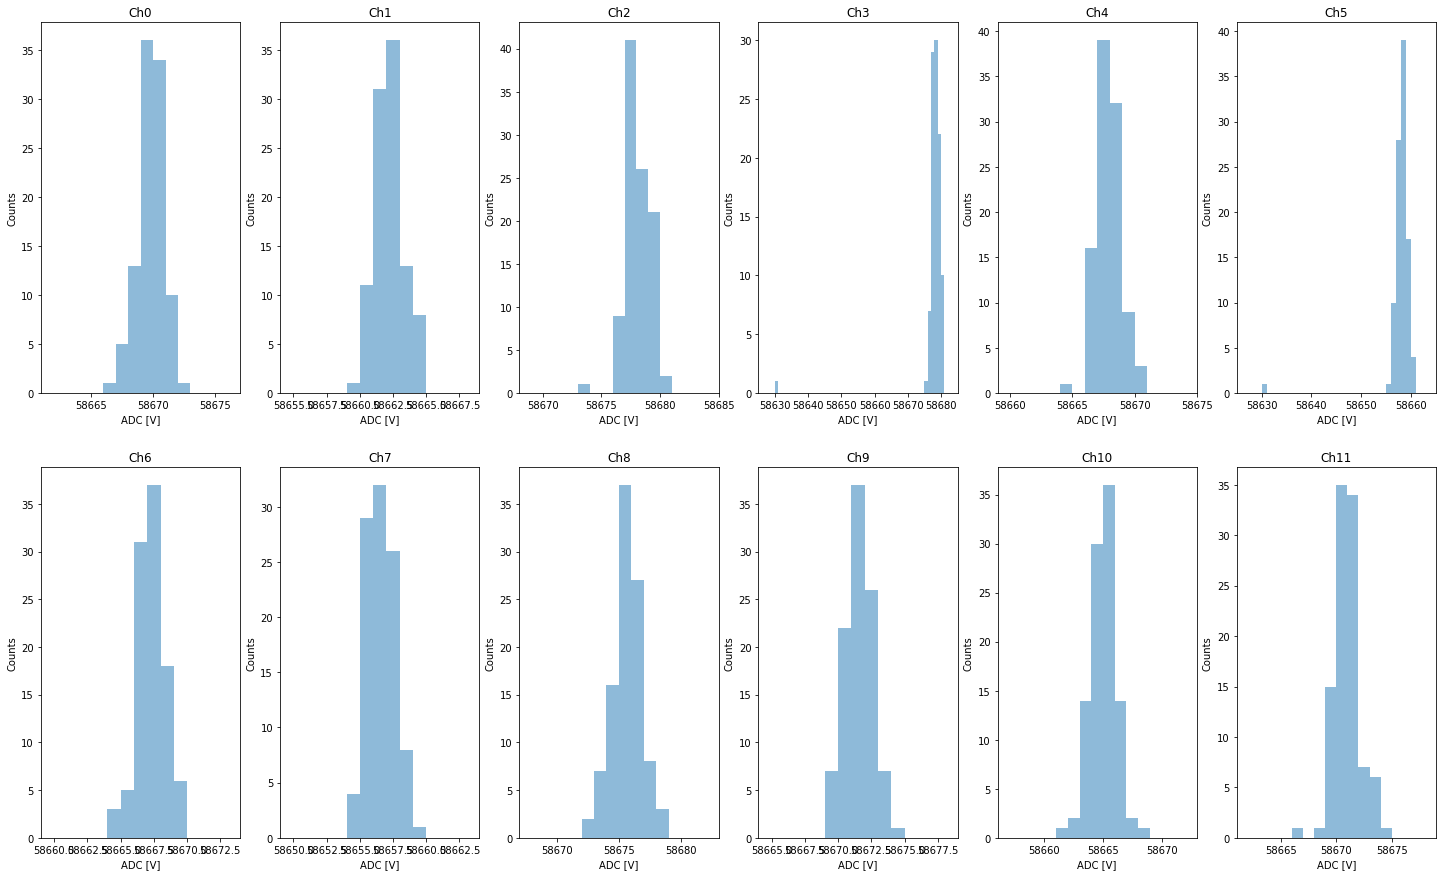

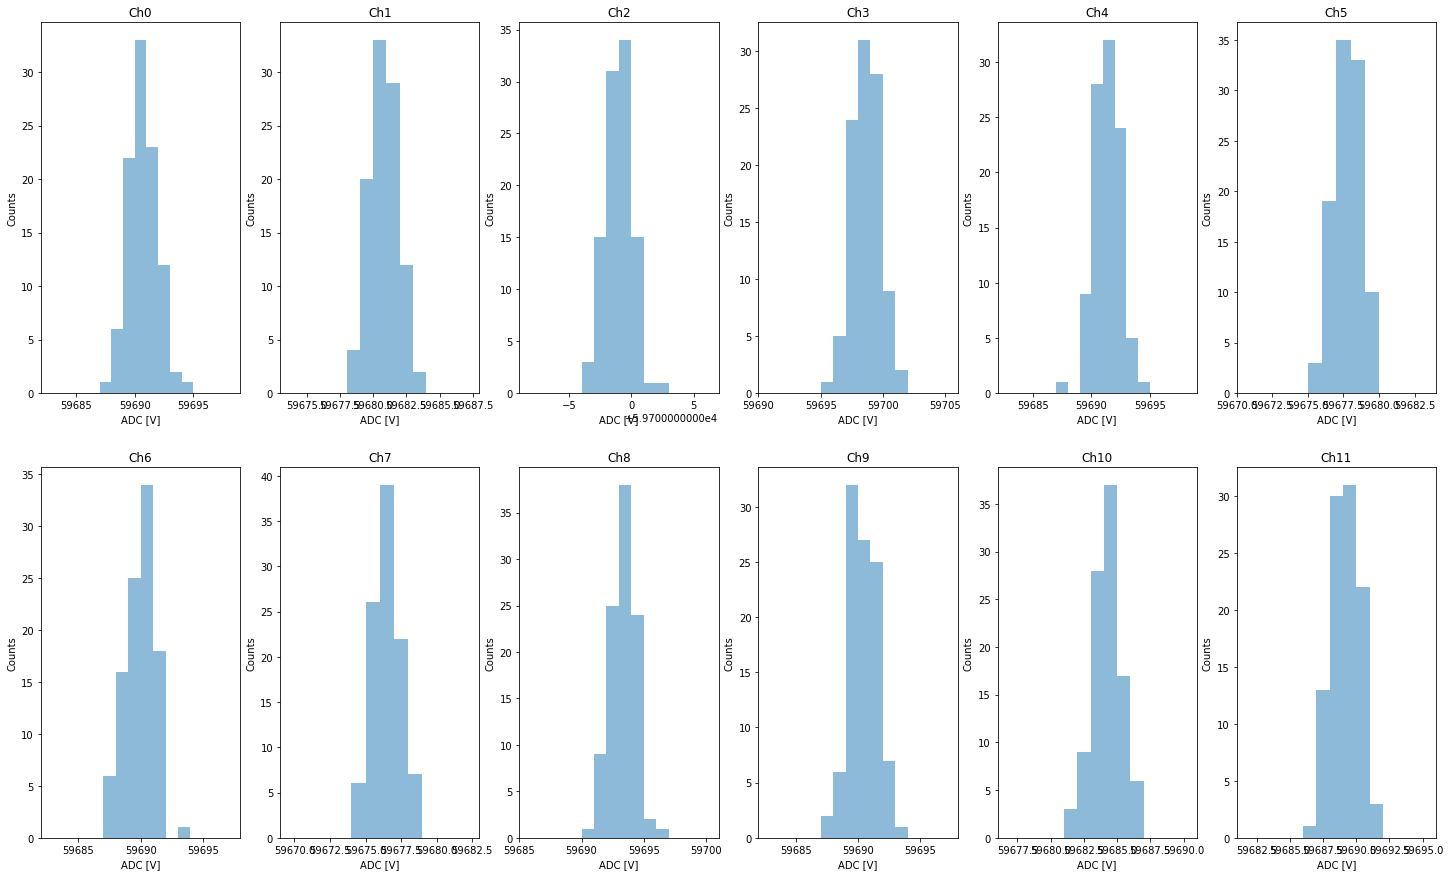

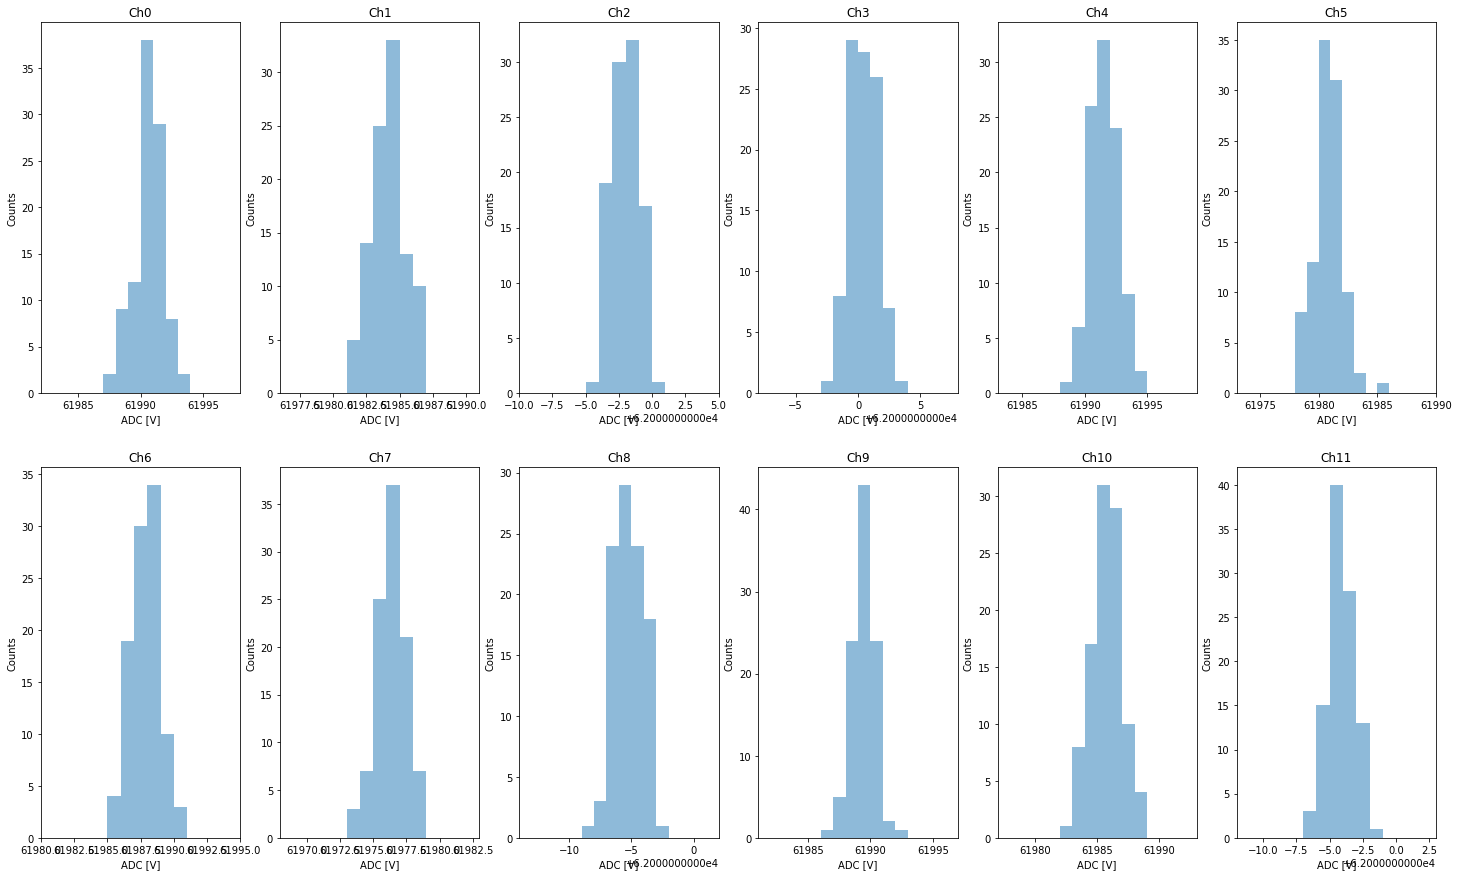

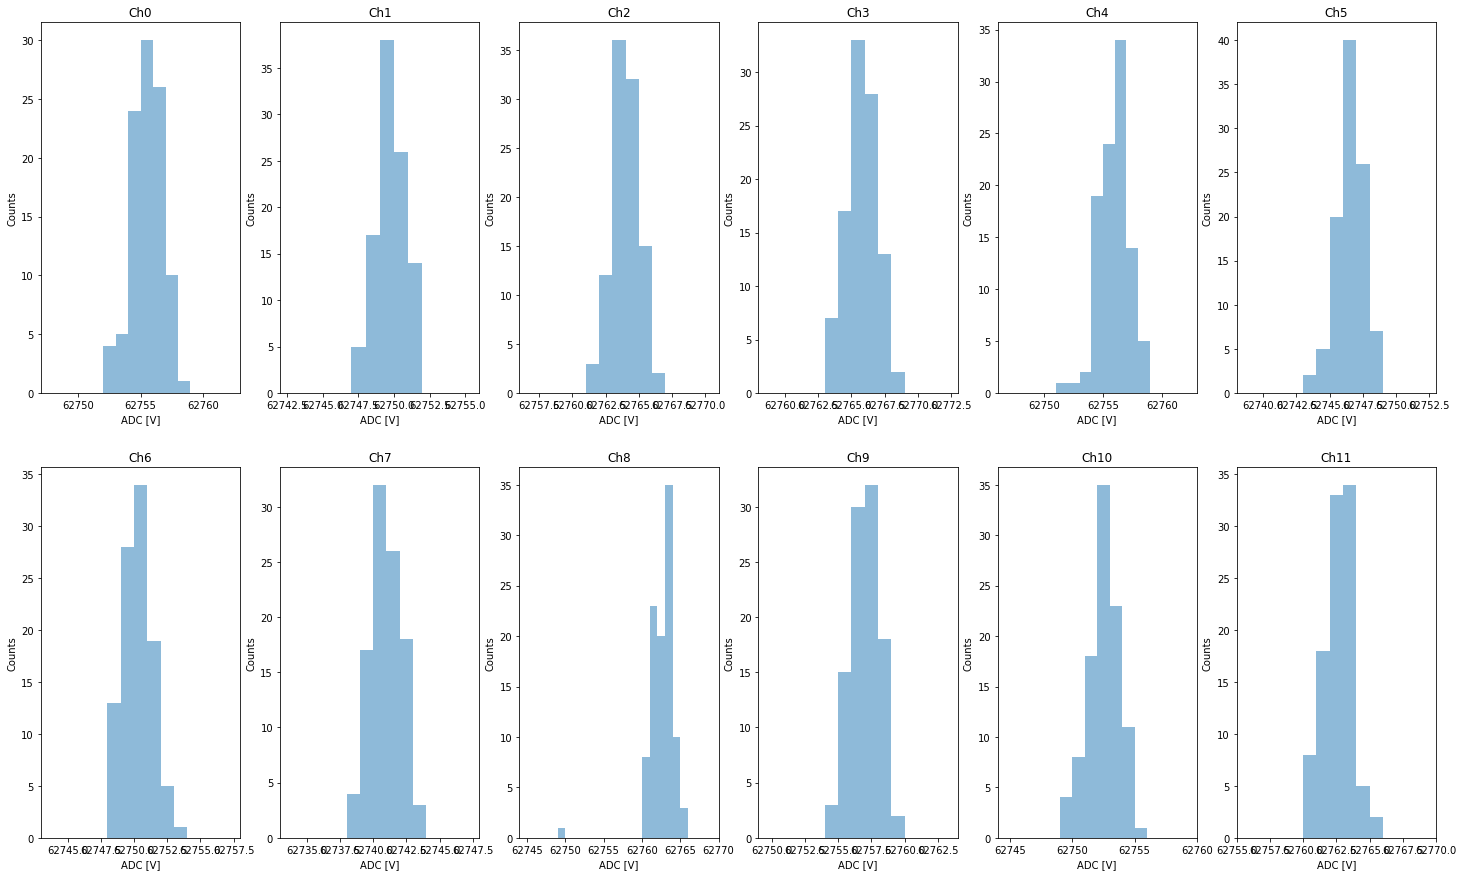

In [6]:
DACset000, ADC000, HV000 = GetADCvalues(file_DACset000)

DACset3FF, ADC3FF, HV3FF = GetADCvalues(file_DACset3FF)

DACsetCFF, ADCCFF, HVCFF = GetADCvalues(file_DACsetCFF)

DACsetFFF, ADCFFF, HVFFF = GetADCvalues(file_DACsetFFF)


In [7]:
#df = pd.DataFrame(list(zip(ADC000, DMM_000, ADC3FF, DMM_3FF, ADCCFF, DMM_CFF, ADCFFF, DMM_FFF)), 
#    columns = ['ADC000', 'DMM000' ,  'ADC3FF', 'DMM3FF', 'ADCCFF', 'DMMCFF', 'ADCFFF', 'DMMFFF'])
#df

#for SN00
df = pd.DataFrame(list(zip(ADC000, DMM_000, ADC3FF, DMM_3FF, ADCCFF, DMM_CFF, ADCFFF, DMM_FFF)), 
    columns = ['ADC000', 'DMM000' ,  'ADC3FF', 'DMM3FF', 'ADCCFF', 'DMMCFF', 'ADCFFF', 'DMMFFF'])
df

,ADC000,DMM000,ADC3FF,DMM3FF,ADCCFF,DMMCFF,ADCFFF,DMMFFF
0,e52d,108.744,e92a,110.637,f226,114.900,f523,116.320
1,e526,108.732,e920,110.619,f220,114.887,f51d,116.307
2,e536,108.759,e932,110.651,f22d,114.913,f52c,116.334
3,e535,108.760,e932,110.651,f230,114.917,f52d,116.337
4,e52b,108.739,e92b,110.635,f227,114.899,f523,116.318
5,e521,108.721,e91d,110.609,f21c,114.879,f51a,116.299
6,e52b,108.738,e929,110.633,f223,114.889,f51e,116.305
7,e520,108.720,e91c,110.609,f218,114.873,f514,116.292
8,e533,108.754,e92d,110.640,f22a,114.905,f52a,116.330
9,e52f,108.749,e92a,110.638,f225,114.899,f525,116.322


In [8]:
df_aftercalibtest = compute_CalibBiasV(df, df_calibparam, values)
df_aftercalibtest.reset_index(inplace=True)
df_aftercalibtest  

,index,ADC000,DMM000,ADC3FF,DMM3FF,ADCCFF,DMMCFF,ADCFFF,DMMFFF,ADC000_calib,...,ADC000sigma,ADC3FF_calib,ADC3FFerr,ADC3FFsigma,ADCCFF_calib,ADCCFFerr,ADCCFFsigma,ADCFFF_calib,ADCFFFerr,ADCFFFsigma
0,0,58669,108.744,59690,110.637,61990,114.900,62755,116.320,108.742991,...,0.544106,110.635415,0.001585,0.855139,114.898465,1.535000e-03,8.281629e-01,116.316392,0.003608,1.946318
1,1,58662,108.732,59680,110.619,61984,114.887,62749,116.307,108.730017,...,1.069868,110.616880,0.002120,1.143782,114.887344,-3.440000e-04,-1.855948e-01,116.305271,0.001729,0.932560
2,2,58678,108.759,59698,110.651,61997,114.913,62764,116.334,108.759673,...,-0.363097,110.650243,0.000757,0.408417,114.911440,1.560500e-03,8.419207e-01,116.333074,0.000926,0.499595
3,3,58677,108.760,59698,110.651,62000,114.917,62765,116.337,108.757819,...,1.176423,110.650243,0.000757,0.408417,114.917000,1.421085e-14,7.667038e-12,116.334927,0.002073,1.118155
4,4,58667,108.739,59691,110.635,61991,114.899,62755,116.318,108.739284,...,-0.153493,110.637268,-0.002268,-1.223901,114.900318,-1.318500e-03,-7.113569e-01,116.316392,0.001608,0.867278
5,5,58657,108.721,59677,110.609,61980,114.879,62746,116.299,108.720749,...,0.135150,110.611319,-0.002319,-1.251416,114.879930,-9.300000e-04,-5.017534e-01,116.299711,-0.000711,-0.383599
6,6,58667,108.738,59689,110.633,61987,114.889,62750,116.305,108.739284,...,-0.693013,110.633561,-0.000562,-0.302940,114.892905,-3.904500e-03,-2.106555e+00,116.307125,-0.002125,-1.146480
7,7,58656,108.720,59676,110.609,61976,114.873,62740,116.292,108.718896,...,0.595630,110.609466,-0.000466,-0.251416,114.872516,4.840000e-04,2.611276e-01,116.288590,0.003410,1.839763
8,8,58675,108.754,59693,110.640,61994,114.905,62762,116.330,108.754112,...,-0.060696,110.640975,-0.000975,-0.526302,114.905879,-8.790000e-04,-4.742379e-01,116.329367,0.000633,0.341516
9,9,58671,108.749,59690,110.638,61989,114.899,62757,116.322,108.746698,...,1.241705,110.635415,0.002585,1.394659,114.896611,2.388500e-03,1.288643e+00,116.320099,0.001901,1.025357


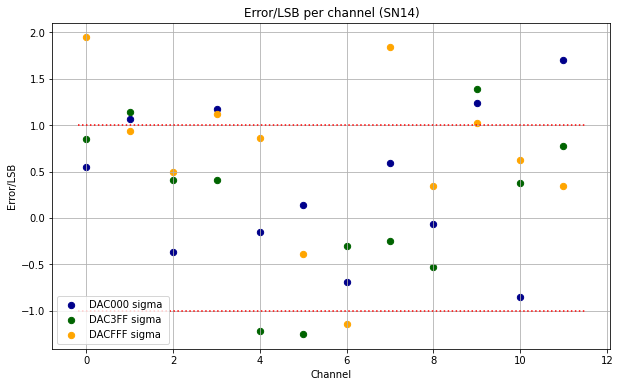

In [9]:
drawplot(df_aftercalibtest, SN_board)

In [10]:
#df_aftercalibtest[['DMM000', 'ADC000_calib', 'ADC000sigma', 'DMM3FF', 'ADC3FF_calib', 'ADC3FFsigma', 'DMMCFF', 'ADCCFF_calib', 'ADCCFFsigma']]


In [11]:
#df_aftercalibtest[['ADC000sigma',  'ADC3FFsigma', 'ADCCFFsigma', 'ADCFFFsigma']]

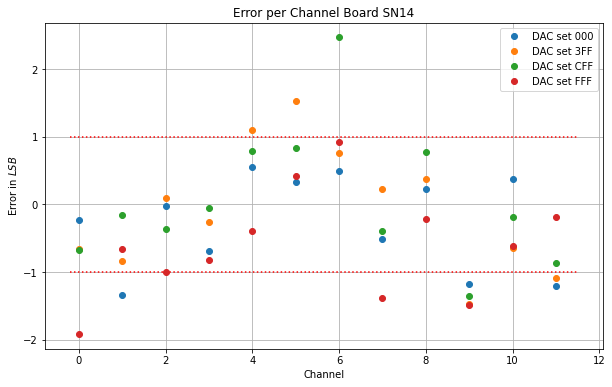

In [12]:
#Try to Draw an RMS-Plot

ADC000 = GetADCvaluesRMS(file_DACset000,DMM_000)
ADC3FF = GetADCvaluesRMS(file_DACset3FF,DMM_3FF)
ADCCFF = GetADCvaluesRMS(file_DACsetCFF,DMM_CFF)
ADCFFF = GetADCvaluesRMS(file_DACsetFFF,DMM_FFF)


plt.figure(figsize=(10,6))
plt.title('Error per Channel Board '+SN_board)
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11],np.array(ADC000)/1.8535e-3,linestyle='none',marker='o',label='DAC set 000')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11],np.array(ADC3FF)/1.8535e-3,linestyle='none',marker='o',label='DAC set 3FF')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11],np.array(ADCCFF)/1.8535e-3,linestyle='none',marker='o',label='DAC set CFF')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11],np.array(ADCFFF)/1.8535e-3,linestyle='none',marker='o',label='DAC set FFF')
#plt.plot([0,1,2,3,4,5,6,7,8,9,10,11],np.array(ADC000)/1.8535e-3,linestyle='none',marker='*',label='DAC set 000 after Fix')
#plt.plot([0,1,2,3,4,5,6,7,8,9,10,11],np.array(ADC3FF)/1.8535e-3,linestyle='none',marker='*',label='DAC set 3FF after Fix')
#plt.plot([0,1,2,3,4,5,6,7,8,9,10,11],np.array(ADCCFF)/1.8535e-3,linestyle='none',marker='*',label='DAC set CFF after Fix')
#plt.plot([0,1,2,3,4,5,6,7,8,9,10,11],np.array(ADCFFF)/1.8535e-3,linestyle='none',marker='*',label='DAC set FFF after Fix')
plt.hlines(1, -0.2, 11.5, linestyles='dotted', color='red')
plt.hlines(-1, -0.2, 11.5, linestyles='dotted', color='red')
plt.ylabel(r'Error in $LSB$')
plt.legend()
plt.xlabel('Channel')
plt.grid()
plt.savefig('./NewToF/'+SN_board+'/'+SN_board+'Plots/'+SN_board+'RMSplotNF.png')